/home/emrullah/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


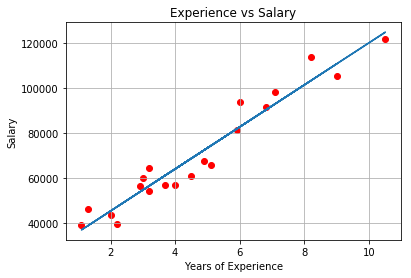

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  
import pandas as pd
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LinearRegression

# Importing the dataset from the url
url = 'https://raw.githubusercontent.com/uzay00/KaVe/master/Ders2/data/Salary_Data.csv'
data = pd.read_csv(url)
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

# Split dataset into train ab=nd test sets
X_train, X_test, y_train, t_test = train_test_split(X,y,test_size = 1/3, random_state = 0)

# fit simple linear regression model to the data
lr = LinearRegression()
lr.fit(X_train, y_train)
# make predicitions
y_pred = lr.predict(X_test)

# Plot
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, lr.predict(X_train))
plt.title('Experience vs Salary'); plt.xlabel('Years of Experience');plt.ylabel('Salary');
#plt.xlabel('Population of City in 10,000s');plt.ylabel('Profit in $10,000s');
plt.grid()

In [11]:
class myRegression():
    def __init__(self,X_train, y_train):
        self.m, self.n = X_train.shape
        self.n += 1 # Add one for x_0 column 
        
        self.X_train = np.hstack((np.ones((self.m,1)), X_train))
        self.y_train = y_train.reshape((self.m,1))
        self.W = np.random.randn(self.n,1)
        print(self.W)
            
    def cost(self):
        h = self.X_train.dot(self.W)
        return np.sum(np.power(h-self.y_train,2))/ (2*self.m)

    def derivative(self):
        h = self.X_train.dot(self.W)  
        derivative = np.sum(self.X_train * (h-self.y_train), axis=0)/ self.m
        return derivative.reshape(self.W.shape)

    def gradient_descent(self, alpha = 0.05, number_steps = 10):
        for i in range(number_steps):
            self.W = self.W - alpha * self.derivative()
        return self.W
    
    def predict(self, X_test):
        m, n = X_test.shape
        X_test = np.hstack((np.ones((m,1)), X_test))#matrisin basına 1 ekler
        return X_test.dot(self.W)#x ve w matrisini carptı
    
    def fit(self):
        self.W = self.gradient_descent()

In [12]:


# Split dataset into train ab=nd test sets
X_train, X_test, y_train, t_test = train_test_split(X,y,test_size = 1/3, random_state = 0)

me = myRegression(X_train, y_train)
me.fit()
me.predict(X_test)



[[0.06012578]
 [0.91311129]]


array([[ 24244.35764448],
       [138559.62841866],
       [ 58019.32400958],
       [ 55421.2496738 ],
       [128167.33107555],
       [117775.03373244],
       [129466.36824344],
       [ 56720.28684169],
       [ 73607.77002424],
       [107382.73638934]])

[[ 1.26039311]
 [-0.41571533]]


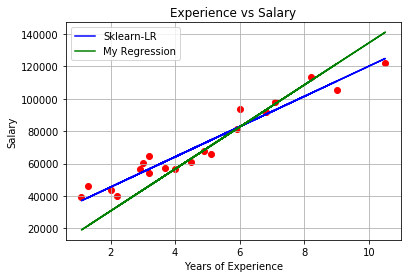

In [13]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  
import pandas as pd
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LinearRegression

# Importing the dataset from the url
url = 'https://raw.githubusercontent.com/uzay00/KaVe/master/Ders2/data/Salary_Data.csv'
data = pd.read_csv(url)
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

# Split dataset into train ab=nd test sets
X_train, X_test, y_train, t_test = train_test_split(X,y,test_size = 1/3, random_state = 0)


############################################################
# fit simple linear regression model to the data
#normal scikit learn kutuphanesi
lr = LinearRegression()
lr.fit(X_train, y_train)
# make predicitions
y_pred = lr.predict(X_test)
############################################################
# fit simple linear regression model to the data
#kendi olusturdugumuz lineear regression  
mr = myRegression(X_train, y_train)
mr.fit()
# make predicitions
y_mr_pred = mr.predict(X_test)
############################################################

# Plot
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, lr.predict(X_train), color = 'blue')
plt.plot(X_train, mr.predict(X_train), color = 'green')
plt.title('Experience vs Salary'); plt.xlabel('Years of Experience');plt.ylabel('Salary');
plt.legend(("Sklearn-LR", "My Regression"))
plt.grid()

In [17]:
mr.cost()   

72562128.23142137

In [19]:
mr.W 

array([[ 4760.03978052],
       [12990.16567059]])

In [20]:
lr.coef_

array([9345.94244312])

In [22]:
lr.intercept_

26816.192244031176

In [23]:
mr.fit

<bound method myRegression.fit of <__main__.myRegression object at 0x7fbee97145c0>>

In [24]:
mr.fit() 